# Segment Shopping Customers
1. Problem Statement: understand the target customers for the marketing team to plan a strategy.
2. Context: Your boss wants you to identify the most important shopping groups based on income, age and the mall shopping score.
3. He wants the ideal numbers of groups with the label for each.

## Objective Market Segmentation
Divide your mall target market into approachable groups. Create a subsets of market based on demographics behavioral criteria to better understand and target for marketing activities.

## The Approach
1. Perform some quick EDA(Exploratory Data analysis)
2. Use KMEANS clustering algorithm to create our segments
3. Use Summary statistics on the clusters
4. Visualize

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings 
warnings.filterwarnings('ignore')

In [15]:
df = pd.read_csv('Customer Segmentation and Clustering/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Univariate Analysis

In [17]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


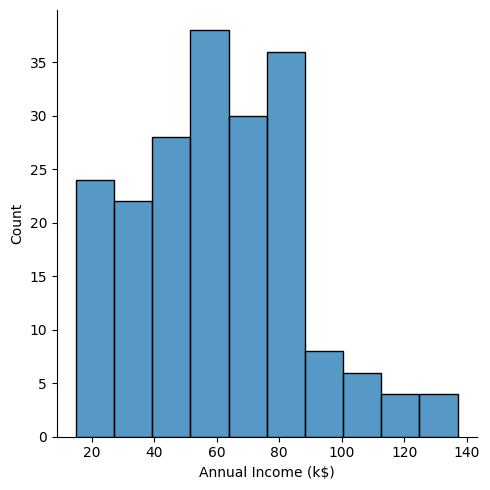

In [19]:
sns.displot(df['Annual Income (k$)'])

In [23]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

<Figure size 640x480 with 0 Axes>

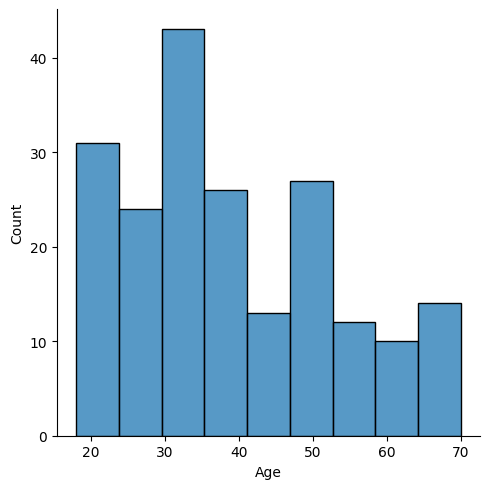

<Figure size 640x480 with 0 Axes>

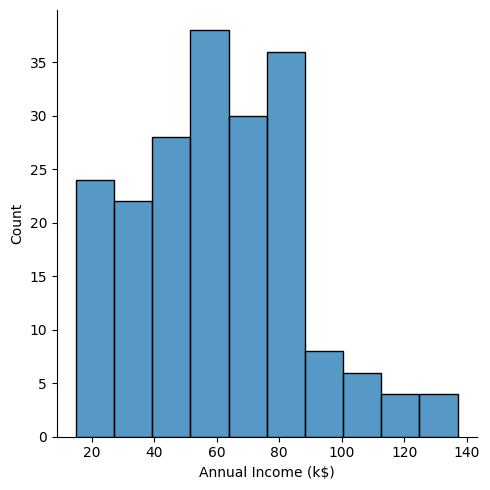

<Figure size 640x480 with 0 Axes>

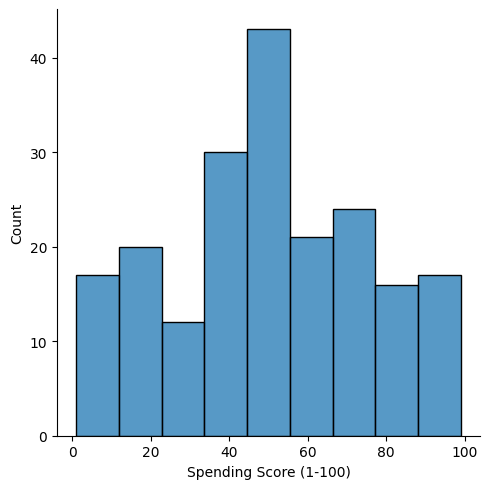

In [25]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    # each time it runs this going to create new figure
    plt.figure()
    sns.displot(df[i])

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

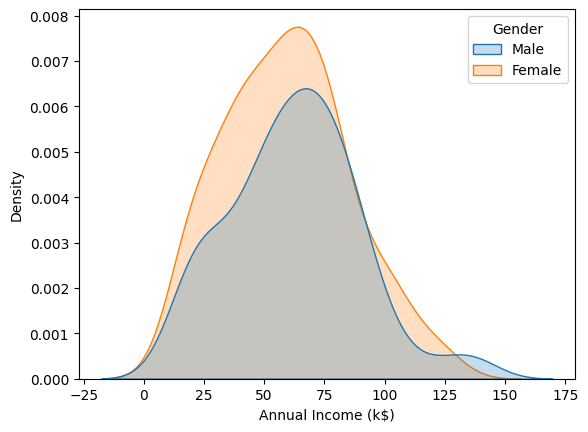

In [33]:
sns.kdeplot(x=df['Annual Income (k$)'], shade = True, hue=df['Gender'])

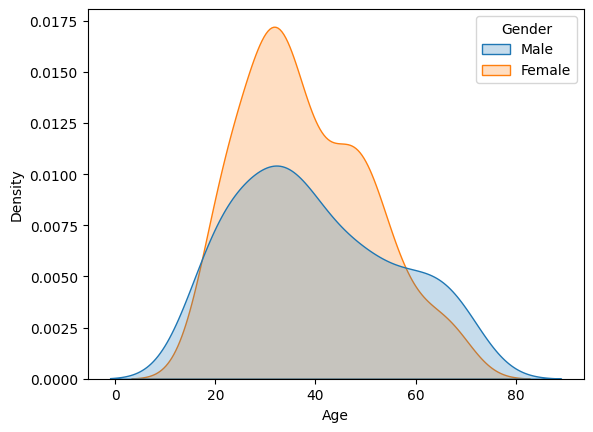

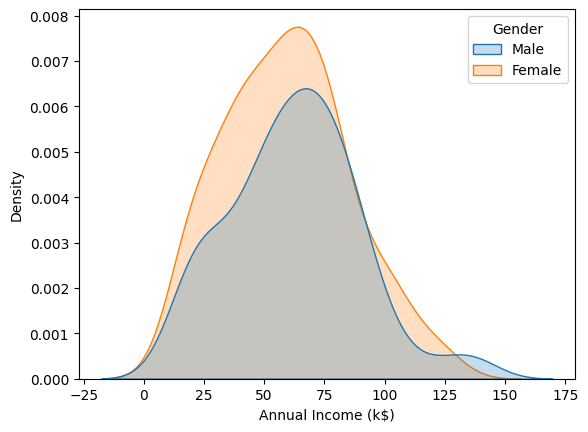

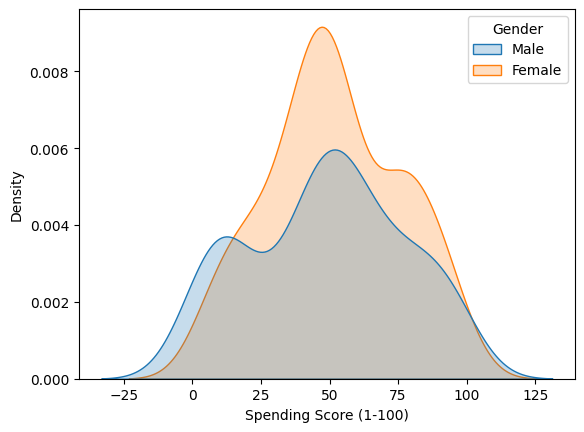

In [35]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    # each time it runs this going to create new figure
    plt.figure()
    sns.kdeplot(x=df[i], shade = True, hue=df['Gender'])

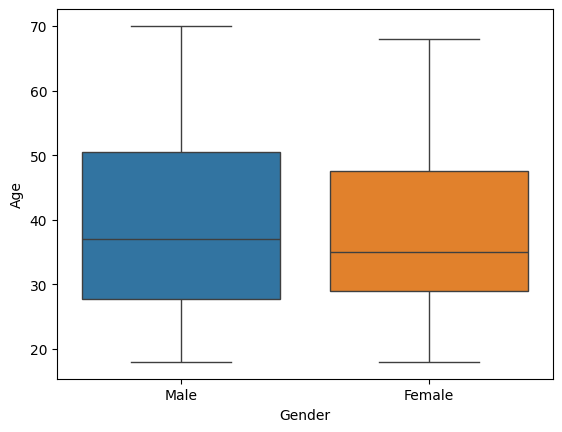

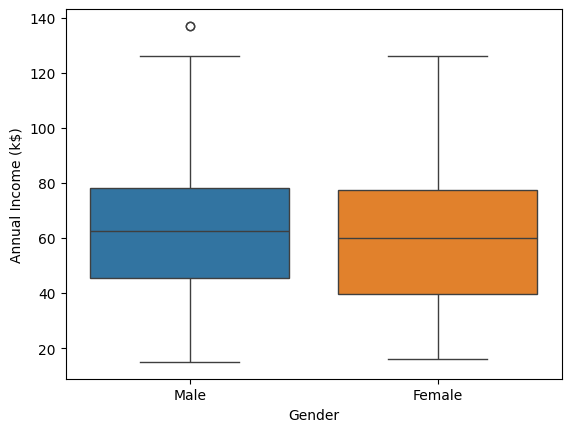

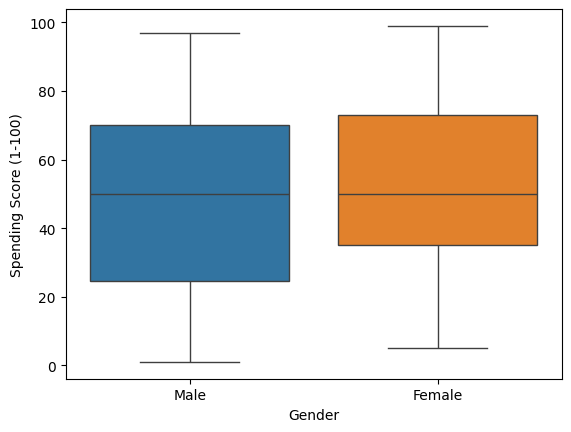

In [39]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    # each time it runs this going to create new figure
    plt.figure()
    sns.boxplot(data=df, x='Gender', y=df[i], hue='Gender')

In [43]:
df['Gender'].value_counts(normalize= True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

## Bivariate Analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

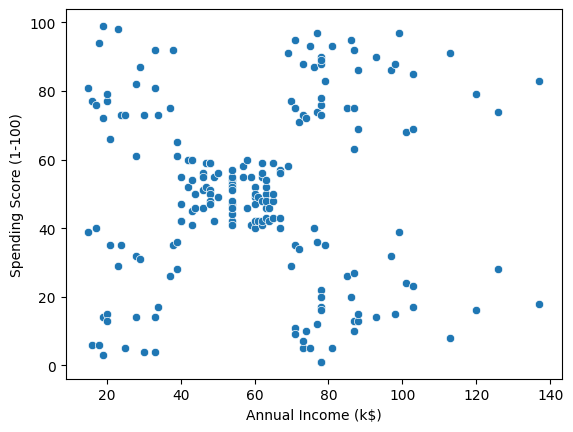

In [45]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)')

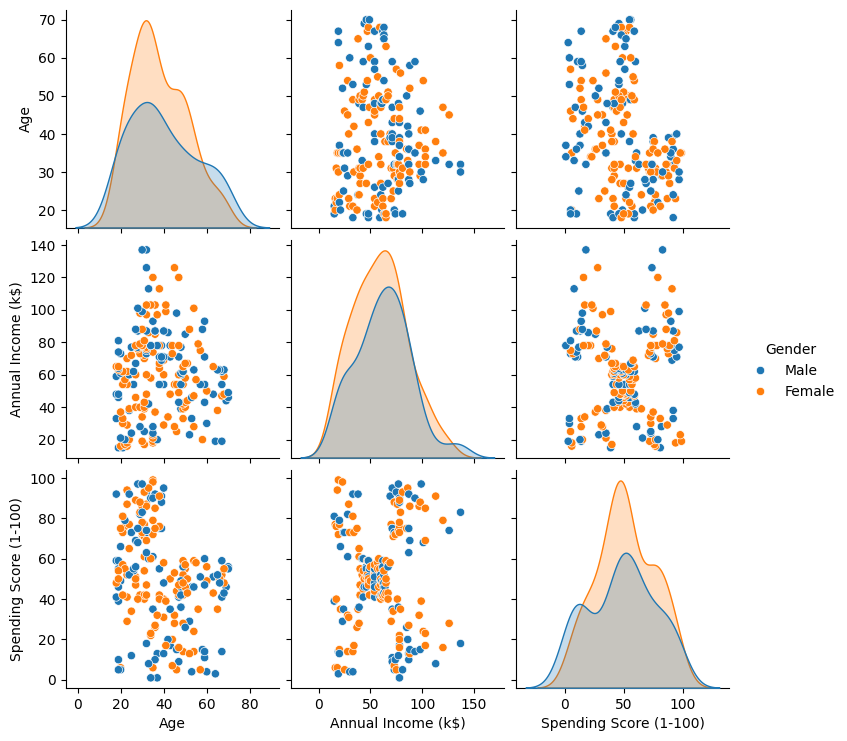

In [55]:
#df=df.drop('CustomerID', axis=1)
sns.pairplot(df, hue='Gender')

In [59]:
df.groupby(['Gender'])[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [63]:
df.corr(numeric_only=True)

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<Axes: >

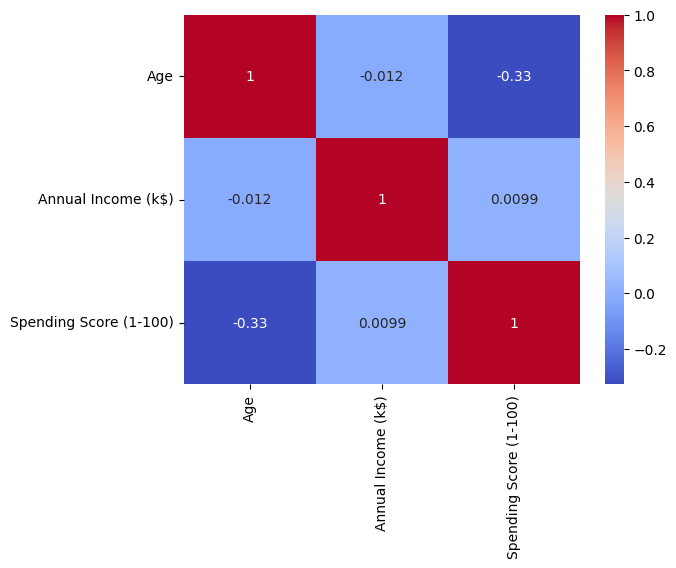

In [65]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')

## Clustering - Univariate, Bivariate, Multivariate

In [97]:
# by default clusters are 8
clustering1 = KMeans(n_clusters=3)

In [99]:
# only take dataframe as a parameter (no series) (training the algo with our data)
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [101]:
clustering1.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [103]:
df['Income Cluster'] = clustering1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,2
1,Male,21,15,81,2
2,Female,20,16,6,2
3,Female,23,16,77,2
4,Female,31,17,40,2


In [105]:
df['Income Cluster'].value_counts()

Income Cluster
1    86
2    58
0    56
Name: count, dtype: int64

We do not know what the ideal number of clusters is and there's our methods that will show us and here we are using elbow method. So, there is a success metric called inertia

In [108]:
# It gives a score and that inertia represents is the distance between the centroids so, we make sure that's relatively no low number but it all depends
# on what we are going to achieve so, we are going to use this elbow method
clustering1.inertia_

25640.457784396833

In [110]:
# 11 because max number of clusters
inertia_scores = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

In [112]:
inertia_scores

[137277.28000000003,
 49761.73701298701,
 25640.457784396833,
 13278.112713472487,
 8684.330924608817,
 7100.505952380954,
 4433.652297410192,
 3003.8059829059835,
 2523.773593073594,
 1962.232017982018]

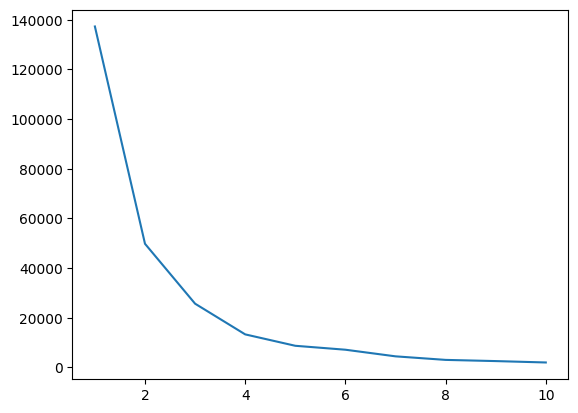

In [114]:
plt.plot(range(1,11), inertia_scores)

By observation, the elbow starts from 3 so, we can use 3 as number of clusters now, change the n_clusters = 3

In [116]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster'],
      dtype='object')

In [120]:
df.groupby('Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,36.910714,92.142857,50.517857
1,41.279070,60.906977,50.337209
2,37.120690,29.551724,49.689655


### Bivariate Clustering

In [138]:
clustering2 = KMeans(n_clusters = 5)
clustering2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])

KMeans(n_clusters=5)

In [140]:
df['Spending and Income Cluster'] = clustering2.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,2,0
1,Male,21,15,81,2,4
2,Female,20,16,6,2,0
3,Female,23,16,77,2,4
4,Female,31,17,40,2,0


In [142]:
inertia_scores2 = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_scores2.append(kmeans.inertia_)

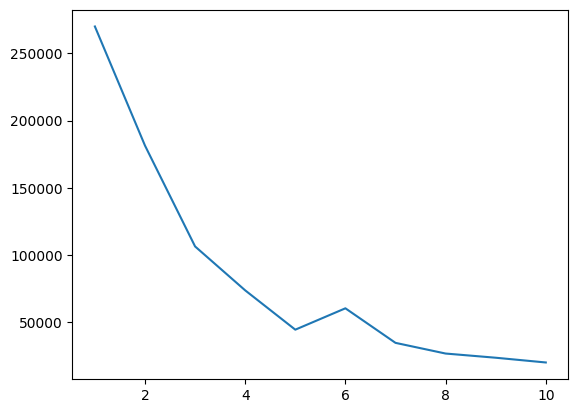

In [144]:
# here elbow is forming around 5 so take 5 as number of clusters
plt.plot(range(1,11), inertia_scores2)

In [162]:
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x', 'y']

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

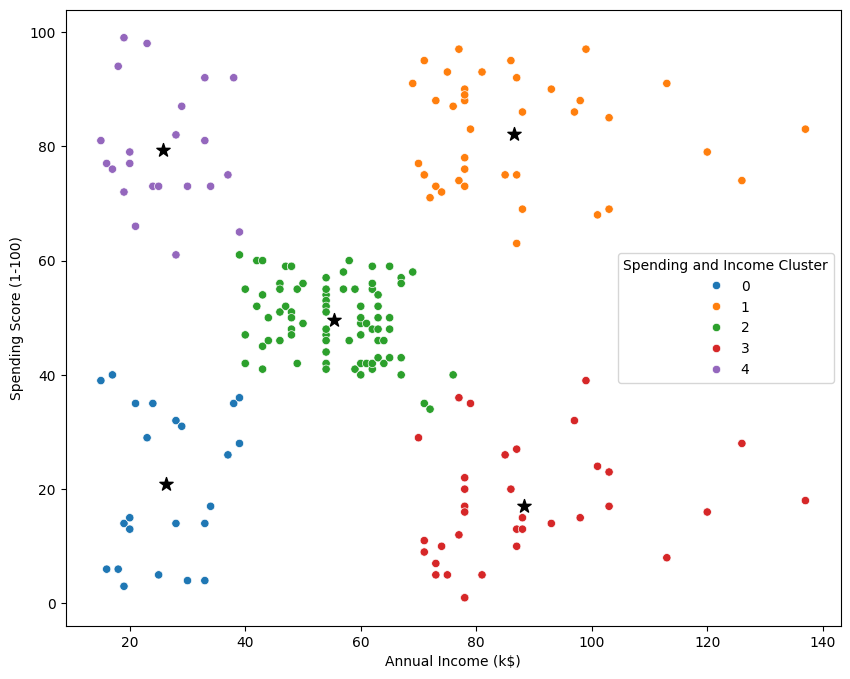

In [164]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'], y=centers['y'], s=100, c='black',marker='*')
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Spending and Income Cluster', palette='tab10')
plt.savefig('clustering_bivariate.png')

In [170]:
# what the percentage of the clusters are very easily by 
pd.crosstab(df['Spending and Income Cluster'], df['Gender'], normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.608696,0.391304
1,0.538462,0.461538
2,0.592593,0.407407
3,0.457143,0.542857
4,0.590909,0.409091


In [172]:
df.groupby('Spending and Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,45.217391,26.304348,20.913043
1,32.692308,86.538462,82.128205
2,42.716049,55.296296,49.518519
3,41.114286,88.200000,17.114286
4,25.272727,25.727273,79.363636


In [176]:
#Multivariate Clustering
from sklearn.preprocessing import StandardScaler

In [178]:
scale = StandardScaler()

In [180]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,2,0
1,Male,21,15,81,2,4
2,Female,20,16,6,2,0
3,Female,23,16,77,2,4
4,Female,31,17,40,2,0


In [184]:
dff = pd.get_dummies(df, drop_first=True)
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,19,15,39,2,0,True
1,21,15,81,2,4,True
2,20,16,6,2,0,False
3,23,16,77,2,4,False
4,31,17,40,2,0,False


In [186]:
dff.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income Cluster',
       'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [194]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


In [196]:
dff = pd.DataFrame(scale.fit_transform(dff))

In [200]:
inertia_scores3 = []
for i in range(1,11):
    kmeans3 = KMeans(n_clusters = i)
    kmeans3.fit(dff)
    inertia_scores3.append(kmeans3.inertia_)

In [202]:
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


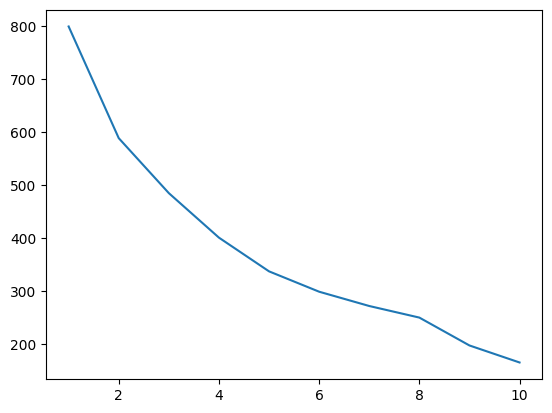

In [204]:
plt.plot(range(1,11), inertia_scores3)

In [ ]:
df.to_csv('Clustering.csv')

## Analysis
### Target Cluster
1. Target group would be cluster 1 which has a high spending score and high income
2. 53 percent of cluster 1 are women. We should look ways to attract these customers using a marketing campaign targeting popular items in this cluster
3. Cluster2 represents an interesting oppurtunity to market to the customers for sales event on popular items.